In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r"C:\Users\admin\OneDrive\ドキュメント\walmart_sales_data.csv")

In [7]:
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax,total,date,time,payment,cogs,gross_margin_pct,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,05-01-2019,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,08-03-2019,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,27-01-2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,08-02-2019,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [9]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   invoice_id        1000 non-null   object 
 1   branch            1000 non-null   object 
 2   city              1000 non-null   object 
 3   customer_type     1000 non-null   object 
 4   gender            1000 non-null   object 
 5   product_line      1000 non-null   object 
 6   unit_price        1000 non-null   float64
 7   quantity          1000 non-null   int64  
 8   tax               1000 non-null   float64
 9   total             1000 non-null   float64
 10  date              1000 non-null   object 
 11  time              1000 non-null   object 
 12  payment           1000 non-null   object 
 13  cogs              1000 non-null   float64
 14  gross_margin_pct  1000 non-null   float64
 15  gross_income      1000 non-null   float64
 16  rating            1000 non-null   float64
d

invoice_id          0
branch              0
city                0
customer_type       0
gender              0
product_line        0
unit_price          0
quantity            0
tax                 0
total               0
date                0
time                0
payment             0
cogs                0
gross_margin_pct    0
gross_income        0
rating              0
dtype: int64

In [10]:
total_revenue = df["total"].sum()
round(total_revenue, 2)

np.float64(322966.75)

In [11]:
branch_revenue = df.groupby("branch")["total"].sum().sort_values(ascending= False)
branch_revenue

branch
C    110568.7065
A    106200.3705
B    106197.6720
Name: total, dtype: float64

In [12]:
product_revenue = (
    df.groupby("product_line")["total"].sum()
    .sort_values(ascending= False)
)
product_revenue

product_line
Food and beverages        56144.8440
Sports and travel         55122.8265
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Home and lifestyle        53861.9130
Health and beauty         49193.7390
Name: total, dtype: float64

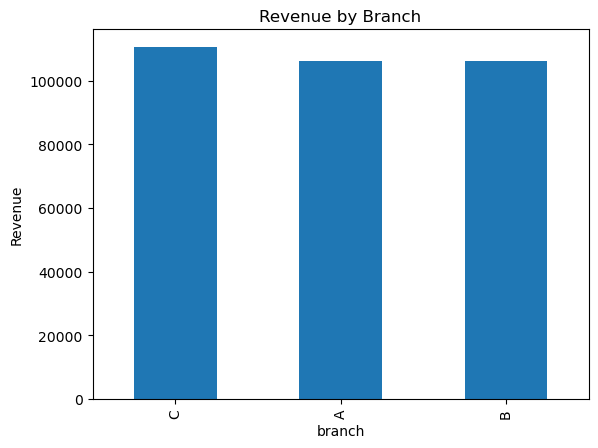

In [14]:
branch_revenue.plot(kind= "bar")
plt.title("Revenue by Branch")
plt.ylabel("Revenue")
plt.show()

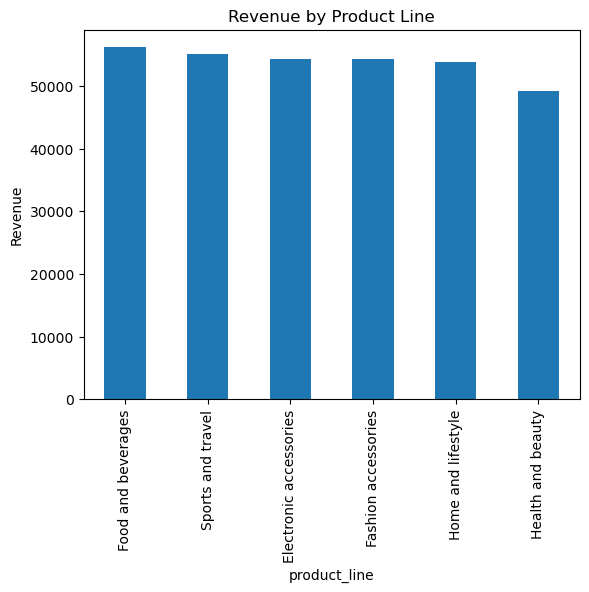

In [15]:
product_revenue.plot(kind="bar")
plt.title("Revenue by Product Line")
plt.ylabel("Revenue")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_5436\3497728044.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["time"]).dt.hour


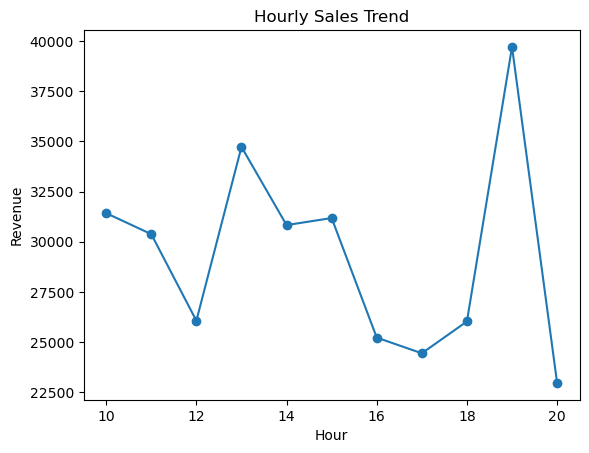

In [21]:
df["hour"] = pd.to_datetime(df["time"]).dt.hour

hourly_sales = df.groupby("hour")["total"].sum()

hourly_sales.plot(kind="line", marker="o")
plt.title("Hourly Sales Trend")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.show()